<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 2</p><br>

## 1. **Working with datetime data;** The object `myDate` contains the date and time. Based on this object answer the following questions and type the answer after your findings.

In [1]:
myDate = "2022-10-01 09:42:43"

a. Convert `myDate` into a datetime object with Iran time zone. Display the result.

In [2]:
from datetime import datetime
datetime.strptime(myDate  , '%Y-%m-%d %H:%M:%S')

datetime.datetime(2022, 10, 1, 9, 42, 43)

In [3]:
from dateutil import parser 
from dateutil.tz import gettz
tzinfos = {"IR" : gettz("Asia/Tehran") }

date = parser.parse("Tue Jun 22 07:46:22 2010 IR" ,tzinfos=tzinfos  )
date

datetime.datetime(2010, 6, 22, 7, 46, 22, tzinfo=tzfile('Asia/Tehran'))

b. Write your codes so that it displays the week day and also the month of `myDate`.

In [4]:
# First way:
days = {0 :  "Monday" , 1 : "Tuesday"  , 2 : "Wednsay" , 3 : "Thursday"  , 4 : "Friday"  , 5 : "Saturday"  , 6 : "Sunday" }
print("Day of Week:",days[date.weekday()])


Day of Week: Tuesday


In [5]:
# Second way:
print(date.strftime("%a"))
print(date.strftime("%B"))

Tue
June


c. What weekday and the month is it after exactly 100 years from `myDate`?

In [6]:
from datetime import timedelta 
from dateutil.relativedelta import relativedelta


In [7]:
    (date + relativedelta(years=100)).strftime("%a")
    (date + relativedelta(years=100)).strftime("%B")

'June'

d. Add two month with myDate and display the resulting date time.

In [16]:
(date + relativedelta(months=2)).astimezone()

datetime.datetime(2010, 8, 22, 7, 46, 22, tzinfo=datetime.timezone(datetime.timedelta(seconds=16200), 'Iran Daylight Time'))

e. Suppose this homework is due on December 23, 2022 by 11.59PM. Compute and display how many seconds you got to complete this homework? Also compute the hours.

In [23]:
tzinfos

{'IR': tzfile('Asia/Tehran')}

In [26]:
relativedelta(dt2= date , dt1=parser.parse("December 23 2022  11:59:00 PM IR" , tzinfos= tzinfos))

relativedelta(years=+12, months=+6, days=+1, hours=+16, minutes=+12, seconds=+38)

f. For the years `2021` & `2022`, count the number of weekends. Which year has the highest number of Weekends?

In [55]:
def count_weekend(year):
    count = 0
    d = datetime.strptime(f"{year}/01/01" ,  "%Y/%m/%d")   
    while True:
        if d.year != year:
            return count
        if d.weekday() == 5 or d.weekday() == 6:
            count += 1            
        d += relativedelta(days = 1)  


In [57]:
print("weekend in 2021" , count_weekend(2021))
print("weekend in 2022" , count_weekend(2022))

weekend in 2021 104
weekend in 2022 105


g. What is the month(MM) and day(DD) on the `305`th day of the current year?

In [60]:
current_year = datetime.now().year
begining_current_year = datetime.strptime(f"{current_year}-01-01" , "%Y-%m-%d")
time_delta = timedelta(days= 304)
the_305th_day = begining_current_year + time_delta
print(the_305th_day.strftime("%B"))
print(the_305th_day.strftime("%d"))

November
01


h. The Date `2022-10-20` is formatted `YYYY-MM-DD`, format it into `MM-DD-YYYY`

In [64]:
date = datetime.strptime('2022 10 20', '%Y %m %d')
date.strftime('%m-%d-%Y')

'10-20-2022'

i. Find if the Date on the question above is the weekend or a weekday.

In [68]:
if date.weekday() in [5,6]:
    print("Weekwnd")
else: print("Business Day")

Business Day


## 2. **Walmart Sales Analysis:** load and read the dataset `walmart_sales.csv` and `walmart_fuel_prices.csv`.

We will follow the following data description when working with the above 2 datasets:

 * `index:` index is a default value of count
 * `Store:` Store is represented in number ID(1,2,3,4,...)
 * `Dept:` Dept is Department in each Store represented in number ID (1,2,3,4,...)
 * `Date:` Date is in YYYY-MM-DD char format - *needs to be converted into Date data type*
 * `Weekly_Sales:` Sales of a given Dept in a given Store for the Date
 * `Temperature:` Average temperature on the Date at given Store region
 * `Fuel_Price:` Cost of the Fuel on the given Date at a given Store
 * `IsHoliday:` Is the given Date a holiday Week? 

In [1]:
import pandas as pd

In [2]:
walmart_sales = pd.read_csv("walmart_sales.csv" , parse_dates= ["Date"] )
walmart_fuel_prices = pd.read_csv("walmart_fuel_prices.csv", parse_dates= ["Date"] )

 a. For both datasets, breakdown the `Date` column and create additional new columns `Year`, `Month`, and `Day`. You should now have additional 3 new columns in your both dataset. Report only the column names for both the dataset.

In [3]:
def seperate_date(df:pd.DataFrame , date_col_name :str = "Date"):
    df_ = df.copy()
    dates = df_[date_col_name].tolist()
    years = []
    days = []
    months = []
    day_of_week = []
    is_weekend = []
    for date in dates:
        years.append(date.year)
        days.append(date.day)
        months.append(date.month)
        day_of_week.append(date.strftime("%a"))
        is_weekend.append(True if date.weekday() in [5,6] else False)

    df_["Year"] = years
    df_["Month"] = months
    df_["Day"] = days
    df_["Day_Of_Week"] = day_of_week
    df_["Is_Weekend"] = is_weekend

    return df_
        


In [4]:
walmart_sales = seperate_date(walmart_sales)
walmart_fuel_prices = seperate_date(walmart_fuel_prices)

b. In `walmart_sales`: which `Month(s)` of `Year` have the highest `Weekly_Sales`? Report the Year, Month, Store, and Dept.

In [5]:
# چیزی که من از سوال فهمیدم این هست که:
# بیشترین فروش هفتگی در کدوم ماه اتفاق افتاده
# نه اینکه بطور میانگین کدام ماه بیشترین فروش هفتگی را داشته....

In [6]:
walmart_sales.groupby("Month").max().nlargest(1,columns = "Weekly_Sales")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Day,Day_Of_Week,Is_Weekend
Month,,,,,,,,,
11,45,99,2011-11-25,693099.36,True,2011,26,Fri,False


c. In `walmart_sales`: calculate the average monthly sales by Department for each Store. Which Store(s) has the highest average monthly sales on the department(s)? Report the Store, Department, Date.

In [7]:
monthly_sales = walmart_sales.groupby(["Year","Store" , "Dept" , "Month"],as_index= False).sum()

In [8]:
monthly_sales.groupby(["Year","Store" , "Dept" ]).mean().nlargest(1, columns= "Weekly_Sales")["Weekly_Sales"]

Year  Store  Dept
2010  14     92      833834.820909
Name: Weekly_Sales, dtype: float64

d. In `walmart_sales`: which month of year `2011` has the highest overall sales by Store? Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. After that do the same for `2012`. Does the highest sales per month fall on the same holiday for both years? Report your findings for both year.

In [11]:
ws2011 = walmart_sales[walmart_sales["Year"]==2011]
ws2011.groupby(["Store" , "Month"]).sum().nlargest(1 , columns= "Weekly_Sales")["Weekly_Sales"]

Store  Month
20     12       13206333.29
Name: Weekly_Sales, dtype: float64

## Store 20 at 11/2011 had largest sales amount

In [12]:
ws2012 = walmart_sales[walmart_sales["Year"]==2012]
ws2012.groupby(["Store" , "Month"]).sum().nlargest(1 , columns= "Weekly_Sales")["Weekly_Sales"]

Store  Month
4      6        10984471.62
Name: Weekly_Sales, dtype: float64

In [ ]:
## Store 4 at 6/2012 had largest sales amount

 e. In `walmart_sales`: report the lowest sales per month for the year `2011` for `IsHoliday == TRUE`. Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Do the same for `2012` and report if the lowest sales are on the same month.

In [16]:
ws2011[ws2011["IsHoliday"]].groupby("Month").sum().nsmallest(1,columns="Weekly_Sales")["Weekly_Sales"]

Month
12    46042461.04
Name: Weekly_Sales, dtype: float64

In [ ]:
##12/2011 had smallest sales amount

In [17]:
ws2012[ws2012["IsHoliday"]].groupby("Month").sum().nsmallest(1,columns="Weekly_Sales")["Weekly_Sales"]

Month
9    48330059.31
Name: Weekly_Sales, dtype: float64

In [ ]:
##09/2012 had smallest sales amount

f. In `walmart_sales`: We have 45 unique stores. Generate a nice plot on the total sales by store for the year `2012`. Report the Store number.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

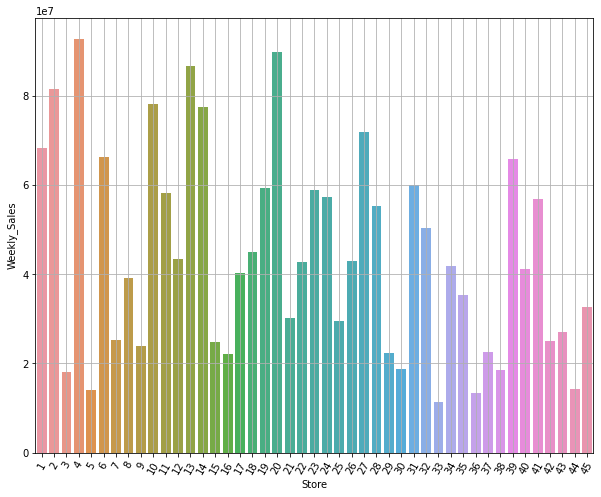

In [23]:
plt_df = ws2012.groupby("Store" , as_index= False).sum()
_ , ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.barplot(data= plt_df , x = "Store" , y = "Weekly_Sales")
ax.set_xticklabels(ax.get_xticklabels() , rotation = 60)
ax.grid()

g. In `walmart_fuel_prices`: For the year `2011` do you think higher the `temperature` relates to higher `fuel price`? Support your answer with a nice plot.

In [26]:
walmart_fuel_prices.head(2)

,index,Store,Date,Temperature,Fuel_Price,IsHoliday,Year,Month,Day,Day_Of_Week,Is_Weekend
0,1,1,2010-02-05,42.31,2.572,False,2010,2,5,Fri,False
1,2,1,2010-02-12,38.51,2.548,True,2010,2,12,Fri,False


<AxesSubplot:xlabel='Temperature', ylabel='Fuel_Price'>

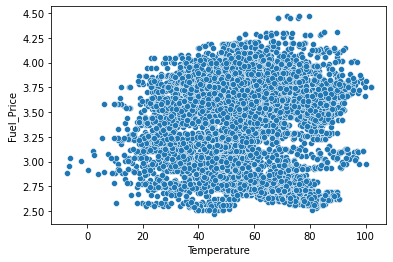

In [27]:
sns.scatterplot(data= walmart_fuel_prices  , x = "Temperature" , y = "Fuel_Price")

<AxesSubplot:>

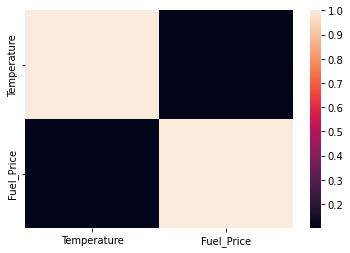

In [31]:
sns.heatmap(walmart_fuel_prices[["Temperature" , "Fuel_Price"]].corr())

In [ ]:
# They do not seem to have great amount of correlation

 h. In `walmart_fuel_prices`: For the year `2010` which `Store` had the lowest Fuel Price? Report the `month` and `temperature`. On the same `month`, what was the highest fuel price for the store? Report the difference.

In [56]:
wf2010 = walmart_fuel_prices[(walmart_fuel_prices["Date"].dt.year == 2010)]

In [57]:
id_minfp = wf2010["Fuel_Price"].idxmin()
minfp = wf2010.loc[id_minfp][["Store","Date" , "Temperature"]]
print("Lowest Fuel Price at Store",minfp["Store"] , "\nmonth:" ,minfp["Date"].month , "\nTemperature: ", minfp["Temperature"] )

Lowest Fuel Price at Store 36 
month: 2 
Temperature:  45.66


i. In `walmart_fuel_prices`: For the `IsHoliday == TRUE`, which month has the lowest `Fuel Price` for the year `2012`? name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Also report month of the highest fuel price and name of the holiday.

In [59]:
wf2012 = walmart_fuel_prices[(walmart_fuel_prices["Date"].dt.year == 2012)  & walmart_fuel_prices["IsHoliday"]]

In [61]:
wf2012.groupby("Month").mean().nsmallest(1 , columns= "Fuel_Price")

,index,Store,Temperature,Fuel_Price,IsHoliday,Year,Day,Is_Weekend
Month,,,,,,,,
12,4156,23,36.764222,3.332222,True,2012,28,False


In [ ]:
# On average among holidays 12th had cheapest fuel price

## 3. **COVID19 Time Series Data:**

<br/>
Download the data from
<a target='_blank' href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv">[github link]</a>
(https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv) 

<br/>
<br/>
The link above contains a time-series data for COVID-19 confirmed cases in the US. Limit the data to only use `New York State` and please answer the following questions:



In [63]:
covid = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

In [65]:
covid.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18752,18752,18847,18847,18847,18847,18847,18847,18847,18961
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,66951,66951,67221,67221,67221,67221,67221,67221,67221,67496
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6989,6989,7007,7007,7007,7007,7007,7007,7007,7027
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7653,7653,7668,7668,7668,7668,7668,7668,7668,7692
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17559,17559,17648,17648,17648,17648,17648,17648,17648,17731


In [66]:
covid_ny = covid[covid["Province_State"] == "New York"]

In [117]:
# We must create positive cases for each day not cummulative sum

In [129]:
import numpy as np
z = np.cumsum(np.array([[1,2,3],[4,5,6]]),axis=1)
z[:,1:] -= z[:,:-1]
z

array([[1, 2, 3],
       [4, 5, 6]])

In [132]:
cumsum = covid[covid.columns[11:]].to_numpy()
cumsum[:,1:] -= cumsum[:,:-1]

In [134]:
diff = pd.DataFrame(cumsum , columns= covid.columns[11:])

In [136]:
covid_diff = pd.concat([covid[covid.columns[:11]] , diff] , axis=1)

a. What is the total confirmed cases in Nebraska as of October 30th 2020 as per the dataset?


In [93]:
from dateutil import parser
dt = parser.parse("October 30 2020")
oct30_2020 = dt.strftime("%m/%d/%y")
oct30_2020

'10/30/20'

In [137]:
print("Total confirmed cases in Nebraska as of October 30th 2020:",covid_diff[covid_diff["Province_State"] == "Nebraska"].sum()[oct30_2020])

Total confirmed cases in Nebraska as of October 30th 2020: 1495


b. On what date has the highest confirmed cases? Demonstrate using a suitable graph for all the available data.


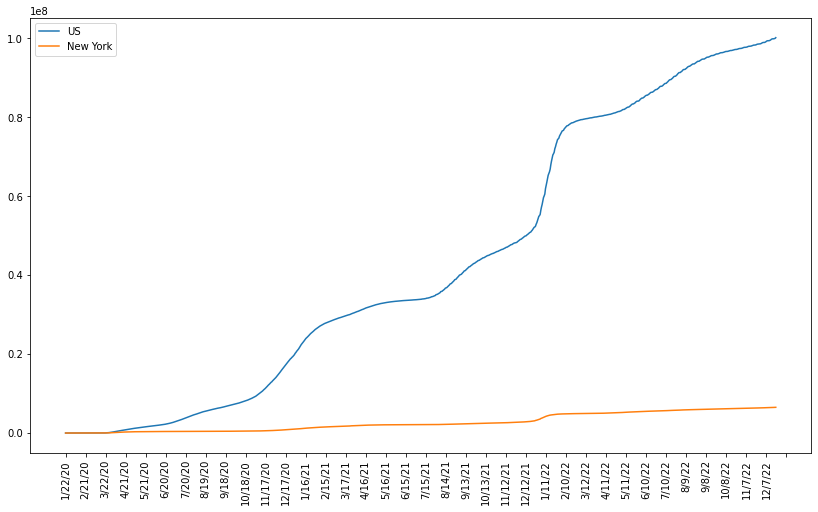

In [116]:
## Cummulative plot

plt.figure(figsize=(14,8))
data = covid[covid.columns[11:]].sum()
data_ny = covid_ny[covid.columns[11:]].sum()
plt.plot(data.index , data.values ,label = "US")
plt.plot(data_ny.index , data_ny.values , label = "New York")
plt.xticks(range(0,1100 , 30) , rotation = 90)
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.legend()
plt.grid()


In [138]:
covid_ny_diff = covid_diff[covid_diff["Province_State"] == "New York"]

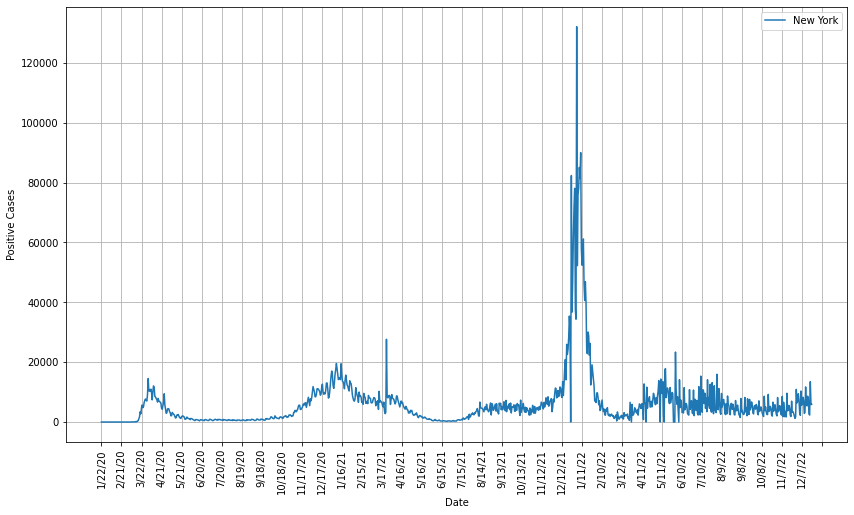

In [139]:

plt.figure(figsize=(14,8))
# data = covid[covid.columns[11:]].sum()
data_ny = covid_ny_diff[covid.columns[11:]].sum()
# plt.plot(data.index , data.values ,label = "US")
plt.plot(data_ny.index , data_ny.values , label = "New York")
plt.xticks(range(0,1100 , 30) , rotation = 90)
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.legend()
plt.grid()


c. Which County has the highest daily confirmed cases? Report both the County name and the date


In [140]:
covid_diff

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,0,0,95,0,0,0,0,0,0,114
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,0,0,270,0,0,0,0,0,0,275
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,0,0,18,0,0,0,0,0,0,20
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,0,0,15,0,0,0,0,0,0,24
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,0,0,89,0,0,0,0,0,0,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,0,21,0,0,0,0,0,0,29,0
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,0,15,0,0,0,0,0,0,16,0
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,0,16,0,0,0,0,0,0,0,0


In [142]:
covid_ny_diff_new = covid_ny_diff.set_index("Admin2",drop=True )
covid_ny_diff_new = covid_ny_diff_new[covid_ny_diff_new.columns[10:]]

In [159]:
t = covid_ny_diff_new.T.max().nlargest(1)
dt = covid_ny_diff_new.T[t.index].idxmax()
print(f"County {t.index[0]} has highset number of daily cases which is {t.values[0]} on {dt[0]}")

County Nassau has highset number of daily cases which is 18951 on 1/3/22


d. Identify two countries that have top total confirmed cases. Generate a time series plot of daily confirm cases for these two countries.


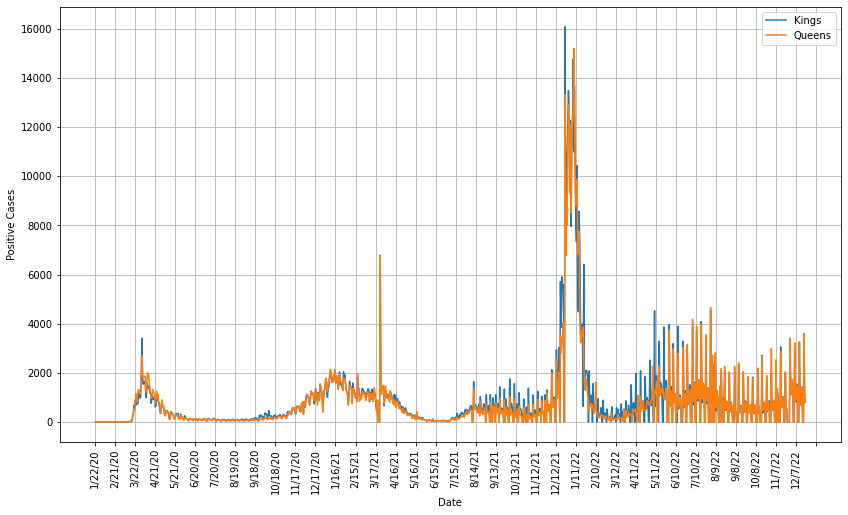

In [166]:
counties = covid_ny_diff_new.T.sum().nlargest(2).index
plt.figure(figsize=(14,8))


for county in counties:
    x = covid_ny_diff_new.loc[county].index
    y = covid_ny_diff_new.loc[county].values
    plt.plot(x , y, label = county)
plt.xticks(range(0,1100 , 30) , rotation = 90)
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.legend()
plt.grid()

e. Show the total confirmed cases for all the locations in an interactive world map (hint: you may use `leaflet` package in `python`.


In [ ]:
# TODO